### Importing Libraries


In [1]:
import numpy as np
import cv2
import os
import itertools
import operator
from matplotlib import pyplot as plt

os.makedirs('output', exist_ok=True)

### Task 1 

In [2]:
!conda env export > environment.yml

### Task 2


True

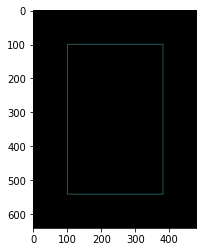

In [3]:
sheet = np.zeros((640, 480, 3), dtype="uint8")
tron = (102, 251, 251)
image = cv2.rectangle(sheet, (100, 100), (380, 540), tron)
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
cv2.imwrite('output/result1.png', imageRGB)


### Task 3


In [4]:
imagePaths = ['./src/input1/1.png', './src/input1/2.png']
for num,image in enumerate(imagePaths):
    cv2.imwrite(f'output/result{num+2}.png', cv2.imread(image))

### Task 4


In [5]:
trainData = './src/Task 4/Example.csv'
testData = './src/Task 4/Test.csv'

In [6]:
with open(trainData, 'r') as f:
    train = f.readlines()
train = [x.strip().split(',') for x in train]
objs = []
for i in train[1:]:
    objs.append(dict(zip(train[0], i)))

In [7]:
with open(testData, 'r') as f:
    test = f.readlines()
test = [x.strip().split(',') for x in test]
objs = []
for i in test[1:]:
    objs.append(dict(zip(test[0], i)))


In [8]:
textColor = (50, 1, 51)
photoColor = (1, 51, 50)
objectColor = (51, 50, 1)

In [9]:
for obj in objs:
    loc = (int(obj['x']), int(obj['y']))
    end = (loc[0]+int(obj['width']), loc[1]+int(obj['height']))

    color = textColor*(obj['Type'] == 'text') + photoColor * \
        (obj['Type'] == 'photo') + objectColor*(obj['Type'] == 'object')

    sheet = np.zeros((int(obj['height_cavas']), int(
        obj['width_canvas']), 3), dtype="uint8")
    
    image = cv2.rectangle(sheet, loc, end, color, -1)

    obj['sheet'] = sheet


In [10]:
def accumulate(l):
    it = itertools.groupby(l, operator.itemgetter(0))
    for key, subiter in it:
       yield key, list((item[1], item[2]) for item in subiter)

In [11]:
wireframes = []
sheets = []

for i in objs:
   sheets.append((i["Wireframe"], i["position"], i["sheet"]))

wireframes = list(accumulate(sheets))

In [12]:
for wireframe in wireframes:
    imag = wireframe[1][0][1]
    
    for sheet in wireframe[1]:
        current_image = sheet[1]
        imag = cv2.addWeighted(imag, 1, current_image, 1, 0)
    imag = cv2.bitwise_not(imag)

    plt.imsave(f'output/result{int(wireframe[0])+3}.png', imag)


### Task 5 ( BONUS )

In [13]:
# Reading Images
images = sorted(['./src/input2/'+x for x in os.listdir('./src/input2/')])

In [14]:
# Setting masks
lower_cigg = np.array([0, 100, 10])
upper_cigg = np.array([60, 255, 255])

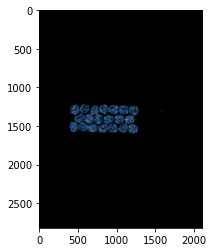

In [15]:
# Tsting Mask
img = cv2.imread(images[0])
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask0 = cv2.inRange(imgHSV, lower_cigg, upper_cigg)

output_img = img.copy()
output_img[np.where(mask0 == 0)] = 0
plt.imshow(output_img)

In [16]:
# Applying Mask
res = []
for image in images:
    img = cv2.imread(image)
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask0 = cv2.inRange(imgHSV, lower_cigg, upper_cigg)

    output_img = img.copy()
    output_img[np.where(mask0 == 0)] = 0
    res.append(output_img)


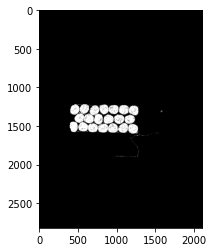

In [17]:
# Testing Grayscale over Binary
temp = cv2.cvtColor(res[0], cv2.COLOR_HSV2RGB)
_, thresh = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY)
gray = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
plt.imshow(thresh)


In [18]:
# Grayscale Binary Conversion
grays = []
for i in res:
    temp = cv2.cvtColor(i, cv2.COLOR_HSV2RGB)
    _, thresh = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY)
    gray = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
    grays.append(gray)


In [20]:
for i,temp in enumerate(grays):
    contours, hierarchy = cv2.findContours(
        temp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    perimeters = [cv2.arcLength(contours[i], True)
                  for i in range(len(contours))]
    
    listindex = [i for i in range(len(perimeters)) if perimeters[i] > perimeters[0]/5]
    print(len(listindex))
    for count,cigg in enumerate(listindex):
        stencil = np.zeros(img.shape).astype(img.dtype)
        cv2.drawContours(
            stencil, [contours[cigg]], 0, (255, 255, 255), cv2.FILLED)
        res = cv2.bitwise_and(img, stencil)
        
        canny = cv2.Canny(res, 10, 255)

        os.makedirs(f'./output/Task5/{i+1}/', exist_ok=True)
        cv2.imwrite(f"./output/Task5/{i+1}/{count}.png", canny)


18
19
17
15
